In [1]:
import pandas as pd
import plotly.express as px

# 1. Load and Inspect Dataset

In [3]:
data = pd.read_csv('C:/Users/AYA/Desktop/project/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()
data.shape
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 2. Data Cleaning

Convert TotalCharges to numeric and handle missing values.

In [5]:
cleaned_data = data.copy()

In [6]:
cleaned_data['TotalCharges'] = pd.to_numeric(cleaned_data['TotalCharges'], errors='coerce')

In [7]:
cleaned_data.duplicated().sum()

np.int64(0)

In [8]:
cleaned_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
cleaned_data = cleaned_data.dropna(subset=['TotalCharges'])
cleaned_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 4. Descriptive Statistics

In [10]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cleaned_data[numeric_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Insights:
tenure ranges from 1 to 72 months.

Average MonthlyCharges ≈ $64.

TotalCharges varies widely depending on how long the customer stayed.

# 4. Explore Categorical Columns

In [11]:
cat_cols = cleaned_data.select_dtypes(include='object').columns
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
for col in cat_cols:
    print(cleaned_data[col].value_counts(normalize=True))

customerID
7590-VHVEG    0.000142
5575-GNVDE    0.000142
3668-QPYBK    0.000142
7795-CFOCW    0.000142
9237-HQITU    0.000142
                ...   
6840-RESVB    0.000142
2234-XADUH    0.000142
4801-JZAZL    0.000142
8361-LTMKD    0.000142
3186-AJIEK    0.000142
Name: proportion, Length: 7032, dtype: float64
gender
Male      0.504693
Female    0.495307
Name: proportion, dtype: float64
Partner
No     0.517491
Yes    0.482509
Name: proportion, dtype: float64
Dependents
No     0.701507
Yes    0.298493
Name: proportion, dtype: float64
PhoneService
Yes    0.903299
No     0.096701
Name: proportion, dtype: float64
MultipleLines
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: proportion, dtype: float64
InternetService
Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: proportion, dtype: float64
OnlineSecurity
No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: proportion, 

### Insights:
Several categorical variables describe services, contract types, and payment methods.

Churn is the target column (Yes = churned, No = stayed).

# 5.Outlier Detection (Boxplots)

In [13]:
for col in numeric_cols:
    fig = px.box(cleaned_data, y=col, points="all", title=f'{col} Boxplot')
    fig.show()

### Insights:
MonthlyCharges shows minor variation at higher ranges but no severe outliers.

TotalCharges increases consistently with tenure.

Outlier Decision:
Although some outliers were detected in the numeric features, they were kept in the dataset because they may represent real customer behavior (e.g., unusually high bills or short tenures), which can be important in predicting churn.

# 6. Numeric Feature Distributions by Churn

In [14]:
for col in numeric_cols:
    fig = px.histogram(cleaned_data, x=col, color="Churn", marginal="box", title=f'{col} Distribution by Churn')
    fig.show()


### Insights:
Customers with shorter tenure are more likely to churn.

Customers with higher MonthlyCharges also show higher churn rates.

# 7. Categorical Features vs Churn

In [15]:
for col in cat_cols:
    if col != 'customerID':
        fig = px.histogram(cleaned_data, x=col, color='Churn', barmode='relative', title=f'{col} vs Churn')
        fig.update_layout(xaxis={'categoryorder':'total descending'})
        fig.show()

### Insights:
Customers with paperless billing and month to month contracts churn more.

Those on 1 or 2 year contracts are more loyal.

# 8. Correlation Matrix

In [16]:
cleaned_data['Churn_encoded'] = cleaned_data['Churn'].map({'No': 0, 'Yes': 1})

corr = cleaned_data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_encoded']].corr()

fig = px.imshow(corr, text_auto=True, color_continuous_scale='Blues', title='Correlation Heatmap')
fig.show()

### Insights:
tenure has a negative correlation with churn to longer-term customers are less likely to leave.

MonthlyCharges and TotalCharges are positively correlated, which is expected.

## Summary of Findings

Customers with shorter tenure and higher monthly charges are most likely to churn.

Month-to-month contracts are the most unstable segment.

Long-term contracts strongly improve customer retention.

This analysis provides strong intuition for building a churn prediction model later.

In [17]:
cleaned_data.to_csv('C:/Users/AYA/Desktop/project/cleaned_Telco-Customer-Churn.csv', index=False)

## 9.Statistical Tests for Feature Relevance:
We now perform statistical tests to understand which features are signifciantly associated with customer churn.

We’ll use:
Chi-Square Test for categorical features  
Mann–Whitney U Test (non-parametric) for numerical features  


In [18]:
#pip install scipy

In [20]:
from scipy.stats import chi2_contingency, mannwhitneyu
import pandas as pd
cleaned_data = pd.read_csv('C:/Users/AYA/Desktop/project/cleaned_Telco-Customer-Churn.csv')
# --- Chi-Square Test  ---
cat_cols = cleaned_data.select_dtypes(include='object').columns.drop('customerID')

chi2_results = []
for col in cat_cols:
    contingency = pd.crosstab(cleaned_data[col], cleaned_data['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

chi2_df = pd.DataFrame(chi2_results).sort_values('p-value')
display(chi2_df)

print("Categorical features with p < 0.05 are significantly related to churn.")


,Feature,Chi2,p-value
15,Churn,7026.876495,0.000000e+00
12,Contract,1179.545829,7.326182e-257
6,OnlineSecurity,846.677389,1.400687e-184
9,TechSupport,824.925564,7.407808e-180
5,InternetService,728.695614,5.831199e-159
14,PaymentMethod,645.429900,1.426310e-139
7,OnlineBackup,599.175185,7.776099e-131
8,DeviceProtection,555.880327,1.959389e-121
11,StreamingMovies,374.268432,5.353560e-82
10,StreamingTV,372.456502,1.324641e-81


Categorical features with p < 0.05 are significantly related to churn.


In [21]:
# --- Mann–Whitney U Test for Numerical Variables ---
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    churn_yes = cleaned_data[cleaned_data['Churn'] == 'Yes'][col]
    churn_no = cleaned_data[cleaned_data['Churn'] == 'No'][col]
    stat, p = mannwhitneyu(churn_yes, churn_no)
    print(f"{col}: p-value = {p:.4f}")

print("numeric features with p < 0.05 differ significantly between churn groups.")


tenure: p-value = 0.0000
MonthlyCharges: p-value = 0.0000
TotalCharges: p-value = 0.0000
numeric features with p < 0.05 differ significantly between churn groups.


### Insights:
Categorical features such as Contract, PaymentMethod, and InternetService often show strong significance.  
Numerical features tenure and MonthlyCharges typically have significant differences between churned and retained customers.


## 10.Feature Engineering:
Now we create new features that capture customer behavior and service usage patterns to improve model performance.

In [25]:
data = pd.read_csv("C:/Users/AYA//Desktop/project/cleaned_Telco-Customer-Churn.csv")
cleaned_data = data.copy()

In [26]:
print(cleaned_data.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_encoded']


In [27]:
# 1.Binary encoding
replace_map = {
    'No internet service': 'No',
    'No phone service': 'No'
}

cols_with_no_service = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_with_no_service:
    cleaned_data[col] = cleaned_data[col].replace(replace_map)

binary_cols = [col for col in cleaned_data.columns if set(cleaned_data[col].dropna().unique()) <= {'Yes', 'No'}]

for col in binary_cols:
    cleaned_data[col] = cleaned_data[col].map({'Yes': 1, 'No': 0})

print("Binary encoding completed successfully!")


Binary encoding completed successfully!


In [31]:
print(cleaned_data.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Churn_encoded', 'tenure_group', 'AvgChargesPerMonth',
       'ServiceCount', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'Tenure_x_Charges'],
      dtype='object')


In [32]:
import pandas as pd

# فرضًا إن cleaned_data متاحة وجاهزة للمعالجة

# 1. Tenure Groups
cleaned_data['tenure_group'] = pd.cut(
    cleaned_data['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0:12m', '13:24m', '25:48m', '49:72m']
)

# 2. Average Monthly Spending per Tenure
cleaned_data['AvgChargesPerMonth'] = cleaned_data['TotalCharges'] / cleaned_data['tenure'].replace(0, 1)

# 3. Service Count (مع تحويل قيم Yes/No إلى 1/0 لو لسه مش معمول)
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']

# لو القيم لسه 'Yes'/'No'، نعمل تحويل مؤقت
for col in service_cols:
    if cleaned_data[col].dtype == 'object':
        cleaned_data[col] = cleaned_data[col].map({'Yes':1, 'No':0})

cleaned_data['ServiceCount'] = cleaned_data[service_cols].sum(axis=1)

# 4. Interaction Feature: Tenure × MonthlyCharges
cleaned_data['Tenure_x_Charges'] = cleaned_data['tenure'] * cleaned_data['MonthlyCharges']

print("Feature engineering completed.")

# حفظ البيانات
cleaned_data.to_csv('C:/Users/AYA/Desktop/project/feature_engineered_telco.csv', index=False)
print("Saved as feature_engineered_telco.csv")


Feature engineering completed.
Saved as feature_engineered_telco.csv


### Insights:
Tenure groups help the model capture retention patterns by time range.  
AvgChargesPerMonth measures spending consistency.  
ServiceCount captures customer engagement with multiple services.  
Binary encoding prepares categorical columns for modeling.  
Tenure Charges interaction identifies high-paying short-tenure customers (often churn-prone).  


<span style="font-family: 'Arial'; color: #f3f3f3ff; font-size: 44px;">
Feature Selection
</span>

In [34]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("C:/Users/AYA/Desktop/project/feature_engineered_telco.csv")

# Display shape and first few rows
print(df.shape)
df.head()




(7032, 30)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,AvgChargesPerMonth,ServiceCount,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Tenure_x_Charges
0,7590-VHVEG,Female,0,1,0,1,0,0,0,1,...,29.850000,1,False,False,False,True,False,False,False,29.85
1,5575-GNVDE,Male,0,0,0,34,1,0,1,0,...,55.573529,3,True,False,False,False,True,False,False,1936.30
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,54.075000,3,False,False,False,False,True,False,False,107.70
3,7795-CFOCW,Male,0,0,0,45,0,0,1,0,...,40.905556,3,True,False,False,False,False,False,False,1903.50
4,9237-HQITU,Female,0,0,0,2,1,0,0,0,...,75.825000,1,False,False,False,True,False,True,False,141.40


In [35]:
# Define X (features) and y (target)
X = df.drop(['customerID', 'Churn_encoded', 'Churn'], axis=1, errors='ignore')
y = df['Churn_encoded']


In [36]:
#Convert All Columns to Numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
X.dtypes
#X.head()

gender                                   float64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
tenure_group                             float64
AvgChargesPerMonth                       float64
ServiceCount                               int64
Contract_One year                           bool
Contract_Two year   

In [37]:
#Normalize the Features (Scaling)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
#Apply the Chi-Square Test
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("✅ Top 10 Features Selected using Chi-Square Test:")
print(selected_features)


✅ Top 10 Features Selected using Chi-Square Test:
Index(['SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
       'TechSupport', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')


In [42]:
!pip install matplotlib




Defaulting to user installation because normal site-packages is not writeable


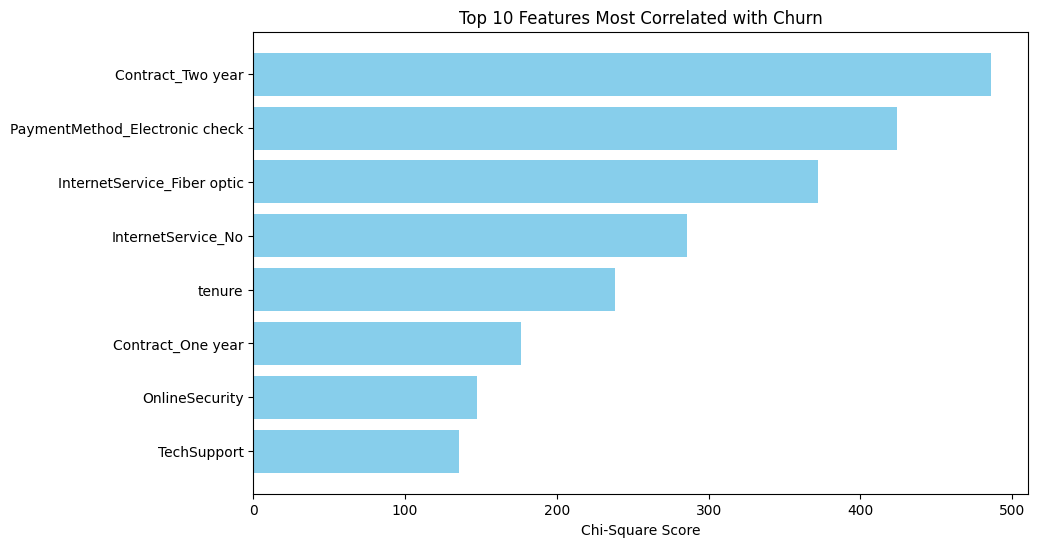

In [43]:
#Visualize Top 10 Features
import matplotlib.pyplot as plt
import numpy as np

# Get chi2 scores and feature names
chi2_scores = selector.scores_
feature_names = X.columns

# Sort features by importance (descending)
sorted_indices = np.argsort(chi2_scores)[::-1][:10]
top_features = feature_names[sorted_indices]
top_scores = chi2_scores[sorted_indices]

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_features, top_scores, color='skyblue')
plt.xlabel("Chi-Square Score")
plt.title("Top 10 Features Most Correlated with Churn")
plt.gca().invert_yaxis()
plt.show()


<span style="font-family: 'Arial'; color: #f3f3f3ff; font-size: 44px;">
Insights:
</span>

Contract Type & Payment Method
Customers on yearly contracts or automatic payments are less likely to churn.

InternetService & Support
Fiber optic users or those without OnlineSecurity/TechSupport show higher churn rates.

Tenure (Customer Age)
Longer-tenure customers are more loyal.

Combined Feature (Tenure_x_Charges)
Shows how spending consistency over time affects churn.

SeniorCitizen
Older customers might have specific service preferences or needs impacting retention.

# Random Forest


In [2]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 208.5 kB/s eta 0:00:40
   -- ------------------------------------- 0.5/8.7 MB 208.5 kB/s eta 0:00:40
   -- ------------------------------------- 0.5/8.7 MB 208.5 kB/s eta 0:00:40
   -- ------------------------------------- 0.5/8.7 MB 208.5 kB/s e

# This code builds a Random Forest model to predict whether a customer will leave (churn) or stay. Here’s what it does step by step:

1-Load Data: Reads the dataset from a CSV file.

2-Prepare Data: Changes any True/False values to 1/0 so the model can work with them.

3-Choose Features: Picks important columns to use for making predictions.

4-Split Data: Divides data into training (to learn) and testing (to check how good the model is).

5-Train Model: Creates the Random Forest and fits it on the training data.

6-Make Predictions: Uses the trained model to guess churn on the test data.

7-Check Results: Prints how accurate the model is and detailed metrics to see how well it works.

8-This helps us find which customers might leave, so companies can try to keep them

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset (adjust the path if needed)
df = pd.read_csv('C:/Users/AYA/Desktop/project/feature_engineered_telco.csv')

# 2. Convert boolean columns to int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# 3. Select features (based on your choice)
selected_features = [
    'SeniorCitizen', 'Dependents', 'tenure', 'OnlineSecurity',
    'TechSupport', 'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
    'InternetService_No'
]

X = df[selected_features]
y = df['Churn']  # Make sure this column exists and is encoded as 0/1

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 5. Create and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 6. Predict on the test set
y_pred = rf.predict(X_test)

# 7. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7533759772565742

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.54      0.55      0.54       374

    accuracy                           0.75      1407
   macro avg       0.68      0.69      0.69      1407
weighted avg       0.75      0.75      0.75      1407



# This code visualizes the importance of each feature in predicting customer churn using the trained Random Forest model.

1-It extracts the importance scores assigned to each feature by the model.

2-Then, it sorts the features from most to least important.

3-Finally, it creates a horizontal bar chart to clearly show which features have the greatest impact on the model’s predictions.

This helps us understand which customer attributes influence churn the most, guiding business decisions and further analysis

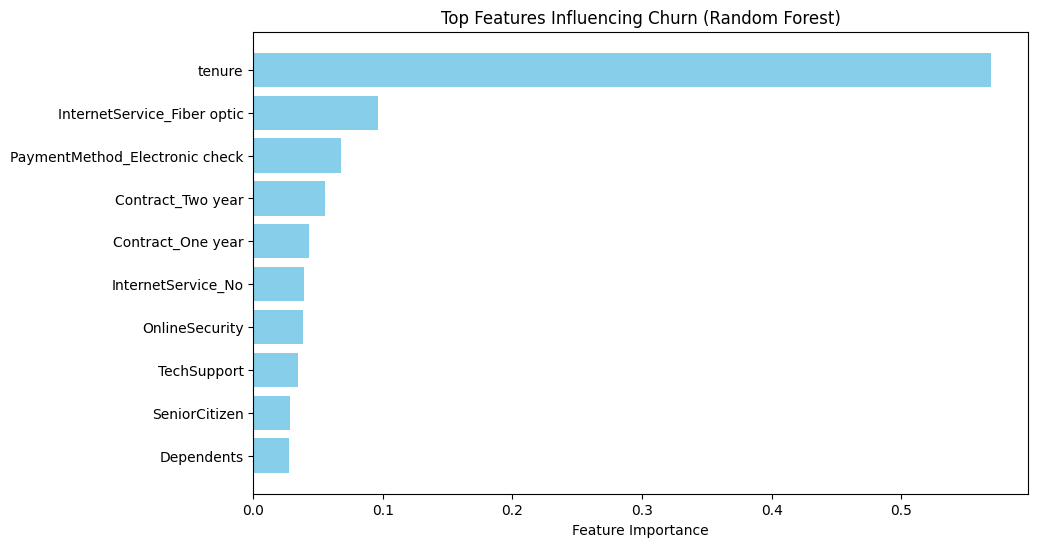

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Extract feature importances from the trained model
importances = rf.feature_importances_
features = np.array(selected_features)

# 2. Sort features by importance
indices = np.argsort(importances)[::-1]

# 3. Plot the chart
plt.figure(figsize=(10,6))
plt.barh(features[indices], importances[indices], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top Features Influencing Churn (Random Forest)")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


# In this code, we train a Random Forest classifier that handles imbalanced data by using the class_weight='balanced' parameter.

- This setting automatically adjusts weights inversely proportional to class frequencies, helping the model to pay more attention to the minority class (e.g., churners).

- We then train the model on the training data and evaluate its performance on the test data.

- The evaluation includes accuracy and a detailed classification report to understand how well the model performs on each class.

Using class balancing usually improves the model’s ability to correctly identify the minority class, which is often more important in churn prediction

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the model with class balancing
rf_balanced = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'  #  This is the magic here
)

# Train the model
rf_balanced.fit(X_train, y_train)

# Predict
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluate
print(" Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\n Classification Report:\n", classification_report(y_test, y_pred_balanced))


 Accuracy: 0.728500355366027

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.80      1033
           1       0.49      0.65      0.56       374

    accuracy                           0.73      1407
   macro avg       0.67      0.70      0.68      1407
weighted avg       0.76      0.73      0.74      1407



# This code creates and trains a Random Forest classifier that handles imbalanced datasets by using the class_weight='balanced' parameter.

- Class balancing adjusts the weight of each class inversely proportional to its frequency, so the model pays more attention to the minority class (for example, customers who churn).

- This approach helps improve the detection of the minority class without losing overall accuracy.

- After training, the model predicts on the test data.

- Finally, the model’s performance is evaluated using accuracy and a detailed classification report showing precision, recall, and F1-score for each class.

This method is especially useful for problems like churn prediction where the classes are imbalanced

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the model with class balancing
rf_balanced = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'  #  This is the magic here
)

# Train the model
rf_balanced.fit(X_train, y_train)

# Predict
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluate
print(" Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\n Classification Report:\n", classification_report(y_test, y_pred_balanced))


 Accuracy: 0.728500355366027

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.80      1033
           1       0.49      0.65      0.56       374

    accuracy                           0.73      1407
   macro avg       0.67      0.70      0.68      1407
weighted avg       0.76      0.73      0.74      1407

